# Decision trees

This workbook will implement decision trees for the binary classification problem of breast cancer diagnosis.
It involves data manipulation/visualisation, hyperparameter selection, recursion, and building a prediction model.

In [2]:
%matplotlib inline
import numpy as np


from sklearn import datasets as ds
from sklearn.decomposition import PCA
from sklearn import preprocessing

import matplotlib.pyplot as plt

## Import data
The first step of any machine learning problem is to load the data. we will be using a built-in dataset provided by the scikit learn package.

In [3]:
data_all = ds.load_breast_cancer()

x = data_all.data
y = data_all.target

y_names = data_all.target_names 

feature_names = data_all.feature_names

## Breast Cancer Wisconsin (Diagnostic) Database
A description of the dataset used is provided here.

Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - target class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of the UCI ML Breast Cancer Wisconsin (Diagnostic) dataset from https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass. They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

```
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/
```

### References
   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.


## Prepare/Split data
The bellow code block splits the data and the targets into training and test sets; 60% for training, 40% for test.

In [4]:
split = int(x.shape[0] * 0.6)

x_train = x[:split,:]
y_train = y[:split]

x_test = x[split:,:]
y_test = y[split:]

print('Training set size:', x_train.shape[0])
print('Test set size:', x_test.shape[0])


Training set size: 341
Test set size: 228


## Data visualisation

Since our data has a feature dimensionality of 30, it is difficult for us to visualise it. We visualize data by using a dimensionality reduction technique called Principal Component Analysis (PCA). 

Given an array in `R^{nxd}` (a matrix of size `n X d` with real entries) with `n` and `d` being the number of data points and the feature dimensionality, respectively, PCA will output an array in `R^{nxm}`, with `m<d`. 

In order to be able to visualise the data on a 2D plot, we choose `m=2` (`m=3` is also a possibility).

(569, 29)
(569, 2)


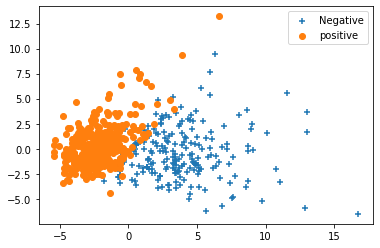

In [6]:
pca = PCA(n_components=2)
x_scaled = preprocessing.scale(x[:,:-1]) # We remove the indexing and make sure all the features are in N(0,1)
x_reduced = pca.fit_transform(x_scaled)

print(x_scaled.shape)
print(x_reduced.shape)

plt.scatter(x_reduced[:,0][y==0], x_reduced[:,1][y==0], marker='+', label='Negative')
plt.scatter(x_reduced[:,0][y==1], x_reduced[:,1][y==1], marker='o', label='positive')

plt.legend()
plt.show()


Next we calculate the entropy. The input is a column vector of target class values, and the output is its entropy.

`y` is an `n X 1` sized matrix where `n` is the number of data points (targets).

In [7]:

def calculate_entropy(y):

    uniqueY = np.unique(y,return_counts=True)

    countY = y.shape[0]

    if len(uniqueY[0])<2:
        return 0
    else:
        firstClass = uniqueY[0][0]
        firstProb = uniqueY[1][0].astype(float)/countY

        secClass = uniqueY[1][0]
        secProb = uniqueY[1][1].astype(float)/countY
    return -1*(firstProb*np.log2(firstProb) + secProb*np.log2(secProb))

print(calculate_entropy(y))

0.9526351224018599


Next using the`calculate_entropy()`function we can create the complete the find_split(x, y)`function.

`find_split(x, y)` takes as input:
 * The data matrix of features, `x` in `R^{nXd}`. `n` is the number of data points and `d` is the feature dimensionality. 
 * `y`, a column vector of size `n` containing the target value for each data point in `x`.

`find_split(x, y)` outputs 'best_split' which is a dictionary with the following keys and their corresponding values:

 * `'feature'`: An integer indexing the attribute/feature chosen to split upon.
 * `'split'`: The value/threshold of this feature to split at.
 * `'infogain'`: A scalar representing the amount of information gained by splitting this way.
 * `'left_indices'`: Indices of the exemplars that satisfy `x[feature_index]<=split`.
 * `'right_indices'`: Opposite set of indices to `left_indices`.

In [9]:

def find_split(x, y):
    """Given a dataset and its target values, this finds the optimal combination
    of feature and split point that gives the maximum information gain."""

    yCount = len(y)
    
    # Need the starting entropy so we can measure improvement...
    start_entropy = calculate_entropy(y)
    
    # Best thus far, initialised to a dud that will be replaced immediately...
    best = {'infogain' : -np.inf}
    
    # Loop every possible split of every dimension...

    for i in range(x.shape[1]):

        for split in np.unique(x[:,i]):

            left_indices = np.where(x[:,i]<=split)[0]
            right_indices = np.where(x[:,i]>split)[0]

            leftEntropy = calculate_entropy(y[left_indices])
            leftCount = len(left_indices)
            rightEntropy = calculate_entropy(y[right_indices])
            rightCount = len(right_indices)

            infogain = start_entropy - ((leftCount/yCount)*leftEntropy) -((rightCount/yCount)*rightEntropy)
            
            if infogain > best['infogain']:
                best = {'feature' : i,
                        'split' : split,
                        'infogain' : infogain, 
                        'left_indices' : left_indices,
                        'right_indices' : right_indices}
    return best

find_split(x_train,y_train)

{'feature': 22,
 'split': 105.0,
 'infogain': 0.6180372496508715,
 'left_indices': array([  3,   5,   9,  19,  20,  21,  37,  38,  40,  41,  46,  47,  48,
         49,  50,  51,  52,  55,  58,  59,  60,  61,  63,  66,  67,  68,
         69,  71,  74,  76,  79,  80,  81,  84,  88,  90,  92,  93,  96,
         97,  98, 101, 102, 103, 104, 106, 107, 109, 110, 111, 113, 114,
        115, 116, 120, 123, 124, 125, 130, 135, 136, 137, 139, 140, 142,
        143, 144, 145, 146, 149, 150, 151, 152, 153, 154, 155, 158, 159,
        160, 163, 165, 166, 169, 170, 173, 174, 175, 176, 178, 179, 183,
        185, 187, 188, 189, 191, 192, 193, 195, 200, 204, 206, 208, 211,
        215, 216, 217, 220, 221, 222, 224, 226, 228, 231, 232, 234, 235,
        238, 240, 241, 242, 243, 245, 246, 247, 248, 249, 251, 266, 267,
        268, 269, 270, 271, 273, 275, 276, 278, 279, 281, 284, 285, 286,
        287, 288, 289, 290, 292, 293, 294, 295, 296, 297, 299, 301, 303,
        304, 305, 306, 307, 308, 309, 310,

The function `find_split()` allows us to find the optimal feature and the best value to split the data into two chunks. Applying this to the original data set splits it into two new data sets. We can then repeat this on both of the new data sets to get four data sets, and so on. This recursion builds a decision tree. It needs a stopping condition, to prevent it dividing the data forever, here we will use two:
 * Maximum depth: The tree is limited to be no deeper than a provided limit.
 * Perfection: If a node contains only one class then there is little point in splitting it further.

We build the function `build_tree(x, y, max_depth)` below to construct a tree. The inputs are: 

 * The data matrix of features, `x` in `R^{nXd}`. `n` is the number of data points and `d` is the feature dimensionality. 
 * `y`, a column vector of size `n` containing the target value for each data point in `x`.
 * The maximum depth of the tree, `max_depth`.

The output of this function is a dictionary. If it has generated a leaf node then the keys are:
 * `'leaf' : True`
 * `'class'` : The index of the class to assign to exemplars that land here.

If it has generated a split node then the keys are:
 * `'leaf' : False`
 * `'feature'`: The feature to apply the `split` to.
 * `'split'`: The split to test the exemplars `feature` with.
 * `'infogain'`: The information gain of this split.
 * `'left'` : The left subtree, for exemplars where `x[feature_index]<=split`
 * `'right'` : The right subtree, for exemplars where `x[feature_index]>split`


In [10]:
def build_tree(x, y, max_depth = np.inf):
    # Check if either of the stopping conditions have been reached. If so generate a leaf node...
    #check if y within std band

    if max_depth==1 or (y==y[0]).all():
        # Generate a leaf node...
        #change for regression to make make leaf mean f y
        classes, counts = np.unique(y, return_counts=True)

        return {'leaf' : True, 'class' : classes[np.argmax(counts)]}
    
    else:
        move = find_split(x, y)
        
        left = build_tree(x[move['left_indices'],:], y[move['left_indices']], max_depth - 1)
        right = build_tree(x[move['right_indices'],:], y[move['right_indices']], max_depth - 1)
        
        return {'leaf' : False,
                'feature' : move['feature'],
                'split' : move['split'],
                'infogain' : move['infogain'],
                'left' : left,
                'right' : right}


After building the tree we should be able to predict the class of a sample. We do that by propagating the sample through the tree, i.e. we check all the splitting conditions until the sample falls in a leaf node, in which case the class of the leaf node is attributed to the sample.

We provide the recursive function `predict_one(tree, sample)` that takes as input the constructed tree, a sample in `R^d` and recursively propagates it through the branches of our tree. The output of this function is the class predicted for the sample.

In [11]:
def predict_one(tree, sample):
    """Does the prediction for a single data point"""
    if tree['leaf']:
        return tree['class']
    
    else:
        if sample[tree['feature']] <= tree['split']:
            return predict_one(tree['left'], sample)
        else:
            return predict_one(tree['right'], sample)


We further generalize the prediction function above to the case where we have a data matrix `R^{nXd}` representing many data points. the function `predict(tree, samples)` below takes as input the constructed tree and a data array then returns an array containing the predictions for all the samples in our input data array.

In [12]:
def predict(tree, samples):
    """Predicts class for every entry of a data matrix."""
    ret = np.empty(samples.shape[0], dtype=int)
    ret.fill(-1)
    indices = np.arange(samples.shape[0])
    
    def tranverse(node, indices):
   
        nonlocal samples
        nonlocal ret
        
        if node['leaf']:
            ret[indices] = node['class']
        
        else:
            going_left = samples[indices, node['feature']] <= node['split']
            left_indices = indices[going_left]
            right_indices = indices[np.logical_not(going_left)]
            
            if left_indices.shape[0] > 0:
                tranverse(node['left'], left_indices)
                
            if right_indices.shape[0] > 0:
                tranverse(node['right'], right_indices)
    
    tranverse(tree, indices)
    return ret


In [13]:
tree1 = build_tree(x_train,y_train)

Next using the functions above can build a tree and report the training and test accuracy.

In [14]:
tree1 = build_tree(x_train,y_train)
predictRes = predict(tree1, x_train)

correct = len(np.where(predictRes[:]==y_train[:])[0])

total = len(x_train[:,0])

accuracy = correct/total

print(accuracy)

1.0


In [15]:
print(tree1)

{'leaf': False, 'feature': 22, 'split': 105.0, 'infogain': 0.6180372496508715, 'left': {'leaf': False, 'feature': 24, 'split': 0.1733, 'infogain': 0.14260717506536755, 'left': {'leaf': False, 'feature': 21, 'split': 23.31, 'infogain': 0.046686955553979476, 'left': {'leaf': True, 'class': 1}, 'right': {'leaf': False, 'feature': 27, 'split': 0.1282, 'infogain': 0.1084651853828234, 'left': {'leaf': False, 'feature': 15, 'split': 0.01202, 'infogain': 0.10581875923418943, 'left': {'leaf': False, 'feature': 7, 'split': 0.02645, 'infogain': 0.43714361201868296, 'left': {'leaf': False, 'feature': 11, 'split': 0.8265, 'infogain': 0.3095434291503252, 'left': {'leaf': True, 'class': 0}, 'right': {'leaf': True, 'class': 1}}, 'right': {'leaf': True, 'class': 0}}, 'right': {'leaf': True, 'class': 1}}, 'right': {'leaf': True, 'class': 0}}}, 'right': {'leaf': True, 'class': 0}}, 'right': {'leaf': False, 'feature': 22, 'split': 114.3, 'infogain': 0.15946418150236125, 'left': {'leaf': False, 'feature': 

Next we can experiment to find the best `max_depth` parameter. We will test over the range 2 to 6

In [16]:
bestMax_depth = 0
bestAccuracy = 0
for max_depth in range(2,6):
    tree = build_tree(x_train,y_train,max_depth)
    predictRes = predict(tree, x_test)
    correct = len(np.where(predictRes[:]==y_test[:])[0])
    total = len(x_train[:,0])
    accuracy = correct/total
    if accuracy>bestAccuracy:
        bestMax_depth = max_depth
        bestAccuracy = accuracy
    
print(bestMax_depth)


4


Finally we can write a recursive function that prints out the best tree learned.

In [17]:
def print_tree(tree1, indent = 0):
    indent = indent+4
    if tree1['leaf']==False:
        print(' '*indent, 'x',tree1['feature'], '<=',tree1['split'])
        print_tree(tree1['left'],indent)
        
        print(' '*indent,'x',tree1['feature'], '>',tree1['split'])
        print_tree(tree1['right'],indent)
        
        
    else:
        print (' '*indent,'predict',tree1['class'])
    

tree1 = build_tree(x_train,y_train,4)
print_tree(tree1,2)


       x 22 <= 105.0
           x 24 <= 0.1733
               x 21 <= 23.31
                   predict 1
               x 21 > 23.31
                   predict 1
           x 24 > 0.1733
               predict 0
       x 22 > 105.0
           x 22 <= 114.3
               x 1 <= 19.65
                   predict 1
               x 1 > 19.65
                   predict 0
           x 22 > 114.3
               x 7 <= 0.02771
                   predict 1
               x 7 > 0.02771
                   predict 0
